# All defects in verified pairs

In [2]:
import json
import pandas as pd

pairs = pd.read_csv("/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/VerifiedPairs.csv")

pairs.drop(columns=["Unnamed: 0"],inplace=True)

pairs['pFile']=pairs.pFile.str.replace('bmp','json')

jsonit = []
path = '/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Peel/'
for file in pairs['pFile']:
    with open(path+file,'r') as f:
        jsonit.append(json.load(f))

viat = []
arkit = []
for j in range(len(jsonit)):
    for i in range(len(jsonit[j]['Defects'])):
        viat.append(jsonit[j]['Defects'][i]['m_ObjDefectName'])

pd.DataFrame(viat).value_counts()

DEFECT_DARK_KNOT       6197
DEFECT_DECAY           1622
DEFECT_SOUND_KNOT       565
DEFECT_HEART            278
DEFECT_HOLE             266
DEFECT_OPEN_SPLIT        39
DEFECT_FISHTAIL_END      18
DEFECT_INNER_SPLIT       17
DEFECT_WANE               3
dtype: int64

# Trying to process an example pair

## Density

In [3]:
drysheet = '20210505172657_52.json'
peelsheet = '20210505123334_85.json'
peelpath = '/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Peel/'
drypath = '/home/jovyan/work/data/nfs_shared_data/Raute/JsonForSchoolProjectTest/Dry/'

In [5]:
eka = jsonit[0]

In [6]:
eka['FileName']

'20210505123334_85.datx'

In [7]:
for key in eka:
    print(key)

FileName
Defects
ObjectData
MoistureBlocks
DensityBlocks
Helpers


In [5]:
x = []
y = []
for dblock in eka['DensityBlocks']:
    for key in dblock:
        if key == 'm_pntTL' or key == 'm_pntTR' or key == 'm_pntBL' or key == 'm_pntBR':
            x.append(dblock[key]['x'])
            y.append(dblock[key]['y'])

In [6]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(24,24))
#plt.scatter(x,y)

In [69]:
len(x)/4

92.0

In [67]:
pd.DataFrame(x)[0].unique()

array([ 765, 1039, 2966, 3240])

In [68]:
pd.DataFrame(y)[0].unique()

array([  34,   98,  162,  226,  290,  354,  418,  482,  546,  610,  674,
        738,  802,  866,  930,  994, 1058, 1122, 1186, 1250, 1314, 1378,
       1442, 1506, 1570, 1634, 1698, 1762, 1826, 1890, 1954, 2018, 2082,
       2146, 2210, 2274, 2338, 2402, 2466, 2530, 2594, 2658, 2722, 2786,
       2850, 2914, 2978])

In [76]:
x1 = []
y1 = []
for dblock in eka['DensityBlocks']:
    for key in dblock:
        if key == 'm_pntTL' or key == 'm_pntTR' or key == 'm_pntBL' or key == 'm_pntBR':
            print(key, "x:",dblock[key]['x'],"y:",dblock[key]['y'])
            x1.append(dblock[key]['x'])
            y1.append(dblock[key]['y'])
    break

m_pntTL x: 765 y: 34
m_pntTR x: 1039 y: 34
m_pntBL x: 765 y: 98
m_pntBR x: 1039 y: 98


In [71]:
x1

[765, 1039, 765, 1039]

In [72]:
y1

[34, 34, 98, 98]

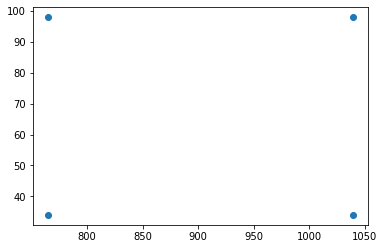

In [80]:
plt.scatter(x1,y1)

In [86]:
x2 = []
y2 = []
i = 0
for dblock in eka['DensityBlocks']:
    for key in dblock:
        if key == 'm_pntTL' or key == 'm_pntTR' or key == 'm_pntBL' or key == 'm_pntBR':
            print(key, "x:",dblock[key]['x'],"y:",dblock[key]['y'])
            if i == 2:
                x2.append(dblock[key]['x'])
            if i == 2:
                y2.append(dblock[key]['y'])
    i += 1
    if i == 3:
        break

m_pntTL x: 765 y: 34
m_pntTR x: 1039 y: 34
m_pntBL x: 765 y: 98
m_pntBR x: 1039 y: 98
m_pntTL x: 765 y: 98
m_pntTR x: 1039 y: 98
m_pntBL x: 765 y: 162
m_pntBR x: 1039 y: 162
m_pntTL x: 2966 y: 34
m_pntTR x: 3240 y: 34
m_pntBL x: 2966 y: 98
m_pntBR x: 3240 y: 98


In [87]:
x2

[2966, 3240, 2966, 3240]

In [89]:
x1

[765, 1039, 765, 1039]

## Moisture

In [7]:
xM = []
yM = []
for dblock in eka['MoistureBlocks']:
    for key in dblock:
        if key == 'm_pntTL' or key == 'm_pntTR' or key == 'm_pntBL' or key == 'm_pntBR':
            xM.append(dblock[key]['x'])
            yM.append(dblock[key]['y'])

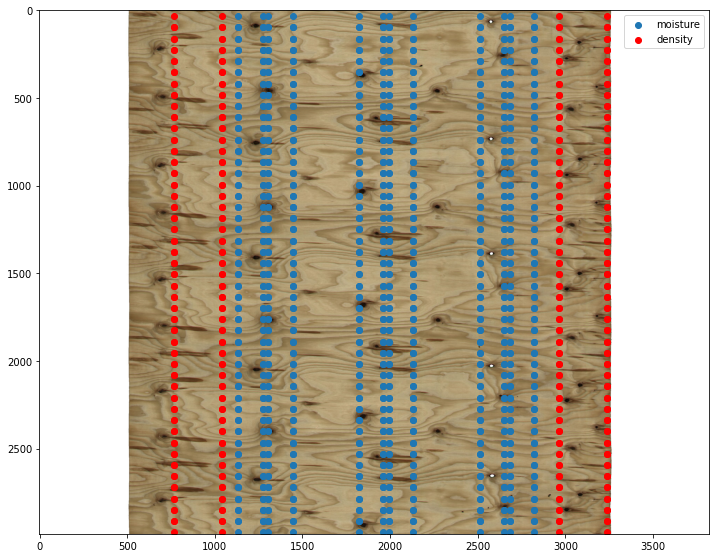

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(xM,yM,label='moisture')
plt.scatter(x,y,c='red', label='density')
img = plt.imread("ColorImage.jpeg")
imgplot = plt.imshow(img)
plt.legend()
#, extent = (-1000, 10406, 5224, -250))

## Defect

In [12]:
xG = []
yG = []
for dblock in eka['Defects']:
    for key in dblock:
        if key == 'm_mmpntGravity':
            xG.append(dblock[key]['x']/0.58152)
            yG.append(dblock[key]['y']/0.58595)

In [17]:
xD = []
yD = []

for dblock in eka['Defects']:
    #print(dblock)
    for key in dblock:
        if key == 'm_pPresentation':
            for keys in dblock[key]:
                if keys == 'm_pntPoint':
                    for coordinates in dblock[key][keys]:
                        xD.append(coordinates['x'])
                        yD.append(coordinates['y'])
    #break
    #for key in dblock:
    #    print(dblock)
    #    break

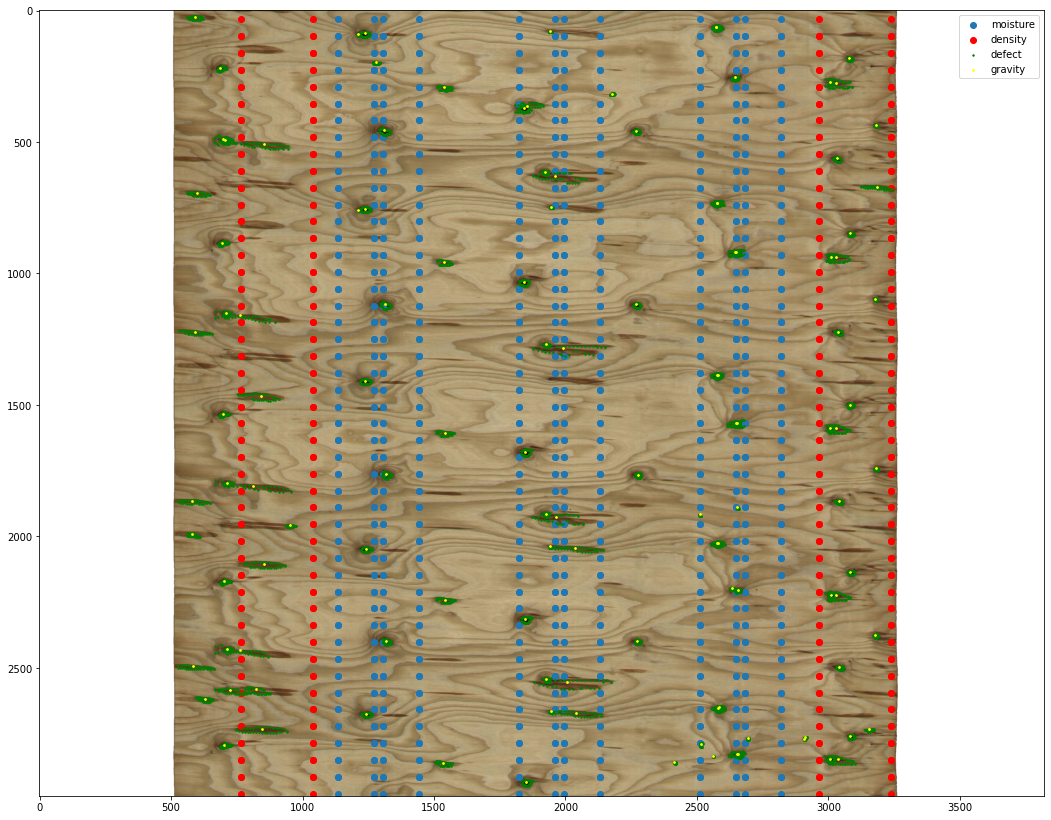

In [19]:
plt.figure(figsize=(18,18))
plt.scatter(xM,yM,label='moisture')
plt.scatter(x,y,c='red', label='density')
plt.scatter(xD,yD,c='green', label='defect',s=2)
plt.scatter(xG,yG,c='yellow', label='gravity', s=3)
img = plt.imread("ColorImage.jpeg")
imgplot = plt.imshow(img)
plt.legend()
#, extent = (-1000, 10406, 5224, -250))

# Json normalize

In [21]:
df_MoistureBlocks = pd.json_normalize(jsonit[0]["MoistureBlocks"]).join(pd.DataFrame(df_MoistureBlocks["m_dCalculatedFeatures"].to_list(), columns=['Moisture','Temperature'])).drop(columns=["m_dCalculatedFeatures","FeaturesExplained"])
df_MoistureBlocks


,m_pntTL.x,m_pntTL.y,m_pntTR.x,m_pntTR.y,m_pntBL.x,m_pntBL.y,m_pntBR.x,m_pntBR.y,Moisture,Temperature
0,1134,34,1272,34,1134,98,1272,98,120.079415,32.715626
1,1306,34,1444,34,1306,98,1444,98,111.417279,32.715626
2,1822,34,1960,34,1822,98,1960,98,126.424345,34.779999
3,1994,34,2132,34,1994,98,2132,98,125.890390,34.779999
4,2510,34,2648,34,2510,98,2648,98,123.073276,33.336249
...,...,...,...,...,...,...,...,...,...,...
271,1306,2914,1444,2914,1306,2978,1444,2978,116.982223,34.230936
272,1822,2914,1960,2914,1822,2978,1960,2978,116.430233,36.615781
273,1994,2914,2132,2914,1994,2978,2132,2978,125.136675,36.615781
274,2510,2914,2648,2914,2510,2978,2648,2978,119.140910,34.099375


In [15]:
jsonit[0].keys()

dict_keys(['FileName', 'Defects', 'ObjectData', 'MoistureBlocks', 'DensityBlocks', 'Helpers'])

In [22]:
temp =  pd.json_normalize(jsonit[0]["MoistureBlocks"])

In [25]:
[name for name in temp['FeaturesExplained'][0]]

['Moisture', 'Temperature']

In [26]:
testing = {"A":[1,2,3],"B":[4,5,6],"C":[7,8,9],"D":[10,11,12]}

In [28]:
deef = pd.DataFrame(testing)

In [30]:
df.drop(columns=df.columns.difference([final_columns]))

,A
0,1
1,2
2,3


In [ ]:
df.drop(columns=df.columns.difference(final_table_columns), inplace=True)